## Load libraries

We are going to work with the dataset CIFAR-10 dataset, which is used for classification tasks. It contains 60,000 32x32 images. We want to use a CNN to classify the images in this dataset. 

In [1]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

__Create plot_history function__ <br>
Defining a function that plots the history of a model as it is learning. 
H = history
It plots the training accuracy and validation accuracy along with loss. 

In [2]:
def plot_history(H, epochs):
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Load cifar10 data

In [2]:
# Loading data
((trainX, trainY), (testX, testY)) = cifar10.load_data()

# Normalizing the data so we get a value between 0 and 1 rather than 0 and 255 
trainX = trainX.astype("float") / 255. 
testX = testX.astype("float") / 255.

In [20]:
trainX.shape
# This is a tensor of 5000 entries of 32x32 with 3 color channels

(50000, 32, 32, 3)

In [4]:
# When we are using tensorflow we need to binarize the labels
# Convert labels (integers) to one-hot vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# Initialize label names for CIFAR-10 dataset, because we want to be able to interpret the predictions later on
labelNames = ["airplane", "automobile", "bird", 
              "cat", "deer", "dog", "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

ShallowNet architecture is a confusing name. It is a very particular kind of a CNN with a particular architecture. 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

ReLU = activation function <br>
FC = fully-connected layer

In [5]:
# initialise/define sequential model
model = Sequential()

# Adding a convolutional layer
# define CONV => RELU layer
model.add(Conv2D(32, (3, 3), # the convolutional layer consists of 32 3x3 kernels. 32 is the depth. Collectively these kernels form a 3D tensor.
                 padding="same", # "same" means 0s which means that we pad with 0s for all rows and columns
                 input_shape=(32, 32, 3))) # 32x32 with 3 color channels
# Activation layer, i.e. relu function
model.add(Activation("relu"))

# softmax classifier
model.add(Flatten()) # flattening
model.add(Dense(10)) # dense layer
model.add(Activation("softmax")) # activation layer

__Compile model__

In [6]:
# Define optimizer
opt = SGD(lr =.01) # lr = "learning rate". This ranges between 0.001 and 0.01

# Compile model
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"]) # we are interested in the accuracy of the model

__Model summary__

In [7]:
# Inspect model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


^Here we can see all the layers in the CNN. We can see the number of learning parameters in each layer. The activation and flattening layer do not have learning parameters, because they are not learning anything. 

We have a total of 328,585 parameters for the model to learn. 

"None" is the batch size. It is none to faciliate changing batch sizes. 

__Plot model__

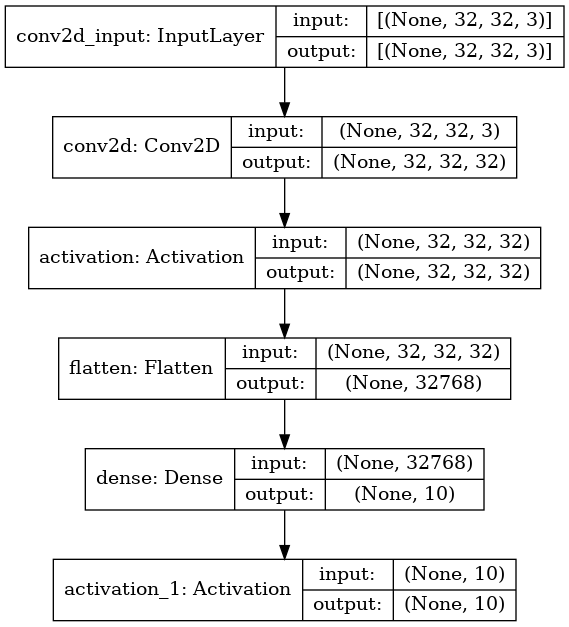

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [9]:
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=40,
              verbose=1)

Epoch 1/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9405 - accuracy: 0.3103 - val_loss: 1.6981 - val_accuracy: 0.3994
Epoch 2/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5945 - accuracy: 0.4485 - val_loss: 1.4854 - val_accuracy: 0.4768
Epoch 3/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4257 - accuracy: 0.5060 - val_loss: 1.4067 - val_accuracy: 0.4952
Epoch 4/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3210 - accuracy: 0.5398 - val_loss: 1.4128 - val_accuracy: 0.5008
Epoch 5/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2510 - accuracy: 0.5620 - val_loss: 1.3307 - val_accuracy: 0.5216
Epoch 6/40
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2187 - accuracy: 0.5779 - val_loss: 1.2762 - val_accuracy: 0.5445
Epoch 7/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1781 - accuracy: 0.5906 - val_loss: 1.2677 - val_ac

__Evaluate model__

In [10]:
# Run predictions
predictions = model.predict(testX, batch_size=32)

In [11]:
# Comparing trained predictions to the known test labels
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.56      0.76      0.64      1000
  automobile       0.75      0.73      0.74      1000
        bird       0.44      0.49      0.46      1000
         cat       0.39      0.54      0.45      1000
        deer       0.63      0.43      0.51      1000
         dog       0.60      0.38      0.46      1000
        frog       0.63      0.80      0.70      1000
       horse       0.71      0.67      0.69      1000
        ship       0.75      0.70      0.73      1000
       truck       0.78      0.59      0.67      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



^The model is perfomring well. It has a weighted f1-score of 0.61, which is good. It is performing better on some categories than others. 

ValueError: x and y must have same first dimension, but have shapes (40,) and (20,)

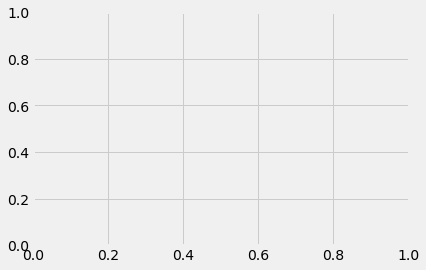

In [28]:
plot_history(H, 40)

From around 5 epochs, the loss does no longer reduce. The training accuracy reaches a peak around 75.

Is this a good model?
- No it is overfitting. We can see this because the validation loss does not get any better, which means that the model is not generalizing very well. It is good at predicitng the trianing data, but it would not work well on unseen data.


How do we counteract overfitting?
- "Early stopping": We stop the model before it starts to overfit. 

## LeNet

LeNet is another kind of architecture that is different from the ShallowNet architecture. The LeNet is more complex than the ShallowNet. 

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

FC => ReLU => FC means a fully-connected layer iwth two hidden layers (ReLU and FC)

__Define model__

In [12]:
# define model
model = Sequential()

# first set of CONV => RELU => POOL
model.add(Conv2D(32, (3, 3), 
                 padding="same", 
                 input_shape=(32, 32, 3)))
model.add(Activation("relu"))

# Adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2))) # 2 horizontal, 2 vertical

# second set of CONV => RELU => POOL
model.add(Conv2D(50, (5, 5), 
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(500)) # dense network with 500 nodes
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10)) # dense layer of 10 nodes used to classify the images
model.add(Activation("softmax"))

__Compile model__

In [13]:
# define optimizer 
opt = SGD(lr=0.01)

# Compile model
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        40050     
_________________________________________________________________
activation_3 (Activation)    (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)             

This time our model has much more training parameters, which means that it is going to take longer to run, and it is also more prone to overfitting. 

__Plot model__

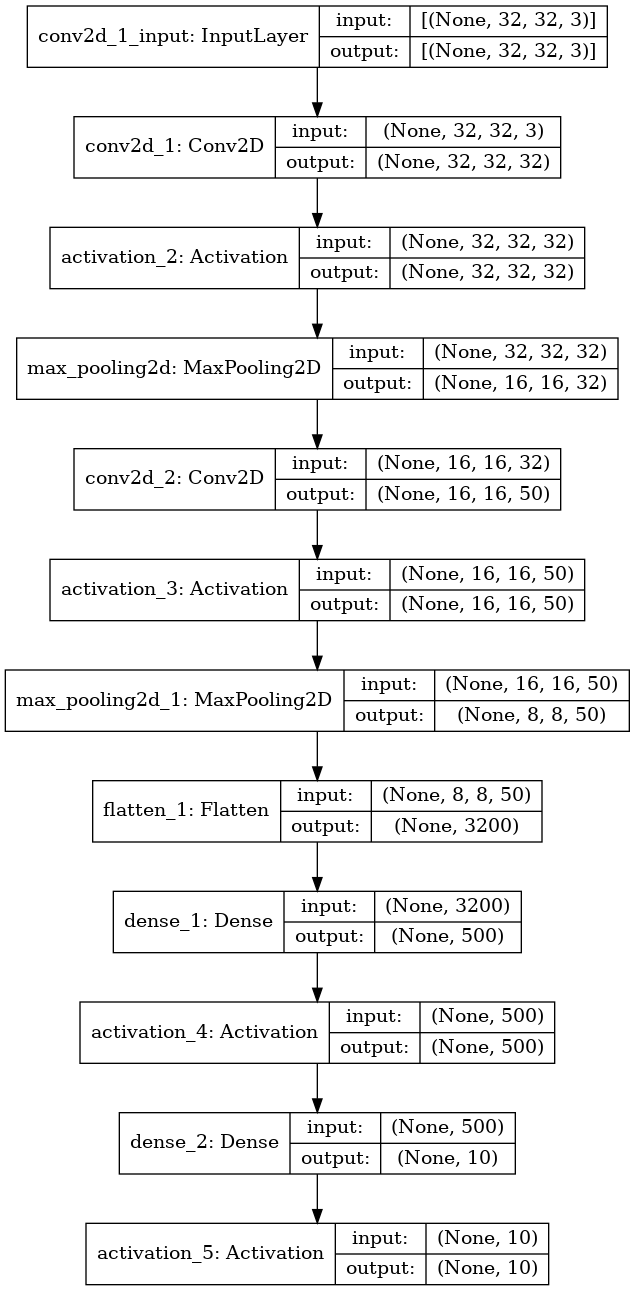

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True)

This LeNet architecture is very complex. 

__Train model__

In [16]:
# train model
H = model.fit(trainX, trainY, 
              validation_data=(testX, testY), 
              batch_size=32,
              epochs=20, # fewer epochs than last time, because we do not want to overfit.
              verbose=1)

Epoch 1/20
1563/1563 [==============================] - 47s 30ms/step - loss: 2.0598 - accuracy: 0.2496 - val_loss: 1.7173 - val_accuracy: 0.3837
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5638 - accuracy: 0.4410 - val_loss: 1.4019 - val_accuracy: 0.4942
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3585 - accuracy: 0.5168 - val_loss: 1.2921 - val_accuracy: 0.5366
Epoch 4/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2449 - accuracy: 0.5603 - val_loss: 1.2955 - val_accuracy: 0.5387
Epoch 5/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1578 - accuracy: 0.5905 - val_loss: 1.1509 - val_accuracy: 0.5929
Epoch 6/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0666 - accuracy: 0.6275 - val_loss: 1.1350 - val_accuracy: 0.6066
Epoch 7/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9848 - accuracy: 0.6575 - val_loss: 1.0925 -

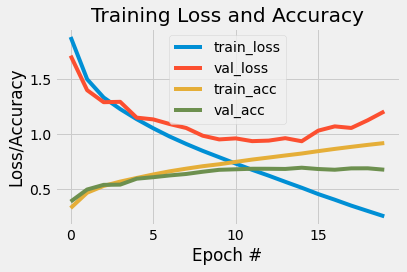

In [18]:
plot_history(H,20)

We see overfitting once again. We could stop the model before the overfitting happens (early stopping). Hence, even though we used fewer epochs for this model, it was still overfitting the data, which means that we cannot just change the epoch and avoid overfitting that way.

In [19]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.79      0.66      0.72      1000
  automobile       0.73      0.84      0.78      1000
        bird       0.63      0.55      0.59      1000
         cat       0.50      0.48      0.49      1000
        deer       0.61      0.66      0.64      1000
         dog       0.46      0.75      0.57      1000
        frog       0.86      0.65      0.74      1000
       horse       0.86      0.61      0.72      1000
        ship       0.77      0.82      0.80      1000
       truck       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

